<a href="https://colab.research.google.com/github/yokesh412/Powerco-customer-churn-prediction/blob/main/new_bcg_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
dataset = pd.read_csv('/content/drive/MyDrive/BCG gamma internship - Copy/price_data.csv')

In [9]:
dataset.shape

(193002, 8)

In [82]:
dataset.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.14,0.02,0.0,0.13,0.15,0.15,0.28
price_peak_var,193002.0,0.05,0.05,0.0,0.00,0.09,0.10,0.23
price_mid_peak_var,193002.0,0.03,0.04,0.0,0.00,0.00,0.07,0.11
price_off_peak_fix,193002.0,43.34,5.41,0.0,40.73,44.27,44.44,59.44
price_peak_fix,193002.0,10.62,12.84,0.0,0.00,0.00,24.34,36.49
price_mid_peak_fix,193002.0,6.41,7.77,0.0,0.00,0.00,16.23,17.46
month,193002.0,6.50,3.45,1.0,4.00,7.00,10.00,12.00
weekday,193002.0,3.25,2.05,0.0,1.00,3.00,5.00,6.00
hour,193002.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
week,193002.0,24.76,15.08,1.0,14.00,27.00,40.00,49.00


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [11]:
dataset.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [12]:
dataset.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [13]:
#converting date column 
dataset['price_date'] = pd.to_datetime(dataset['price_date'])
dataset['month'] = dataset.price_date.dt.month
dataset['weekday'] = dataset.price_date.dt.weekday
dataset['hour'] = dataset.price_date.dt.hour
dataset['week'] = dataset.price_date.dt.week

In [14]:
dataset.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month,weekday,hour,week
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,1,3,0,1
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2,6,0,5
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,3,6,0,9
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,4,2,0,14
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,5,4,0,18


In [15]:
#droping date column
dataset.drop(columns=['price_date'], inplace=True)

In [16]:
dataset.weekday.unique()

array([3, 6, 2, 4, 0, 5, 1])

In [17]:
dataset.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [18]:
dataset.week.unique()

array([ 1,  5,  9, 14, 18, 23, 27, 31, 36, 40, 44, 49])

In [19]:
dataset.isnull().sum()

id                    0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
month                 0
weekday               0
hour                  0
week                  0
dtype: int64

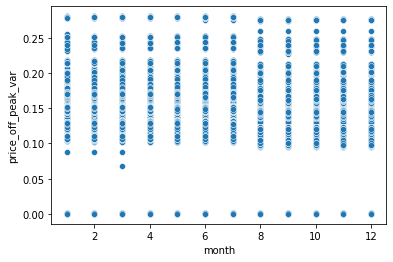

In [20]:
sns.scatterplot(data=dataset, x="month", y="price_off_peak_var")

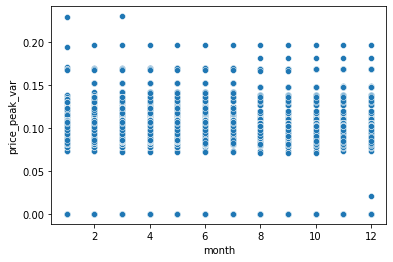

In [21]:
sns.scatterplot(data=dataset, x="month", y="price_peak_var")

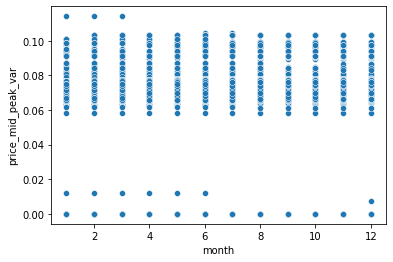

In [22]:
sns.scatterplot(data=dataset, x="month", y="price_mid_peak_var")

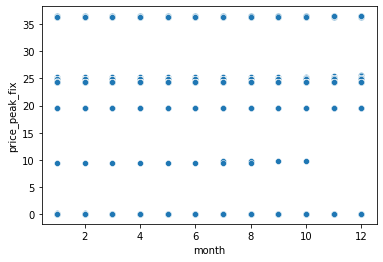

In [23]:
sns.scatterplot(data=dataset, x="month", y="price_peak_fix")

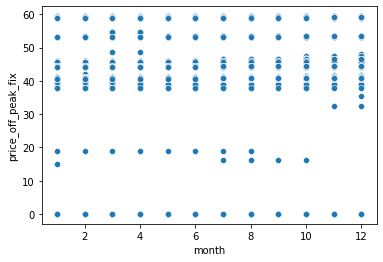

In [24]:
sns.scatterplot(data=dataset, x="month", y="price_off_peak_fix")

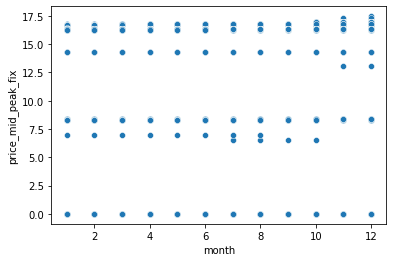

In [25]:
 sns.scatterplot(data=dataset, x="month", y="price_mid_peak_fix")

In [26]:
import seaborn 

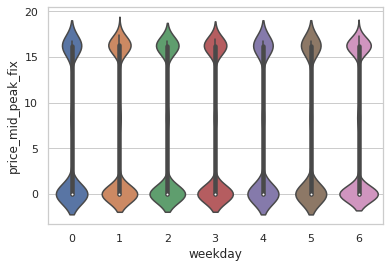

In [27]:
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ='weekday', y ='price_mid_peak_fix', data = dataset)


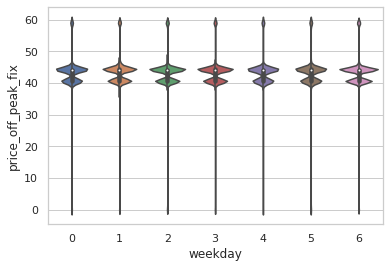

In [28]:
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ='weekday', y ='price_off_peak_fix', data = dataset)

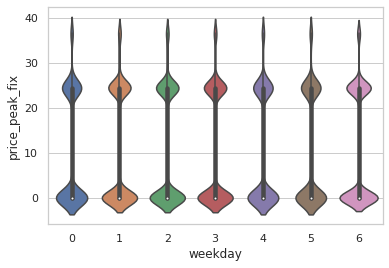

In [29]:
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ='weekday', y ='price_peak_fix', data = dataset)

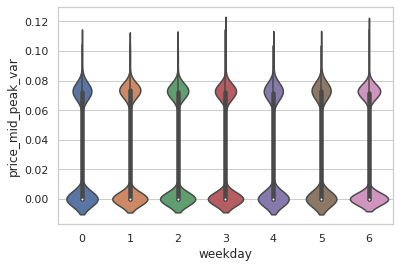

In [30]:
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ='weekday', y ='price_mid_peak_var', data = dataset)

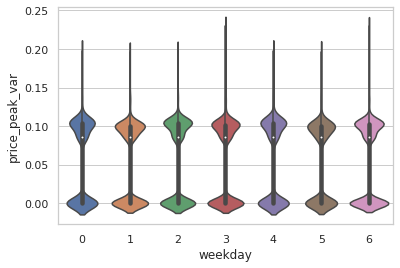

In [31]:
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ='weekday', y ='price_peak_var', data = dataset)

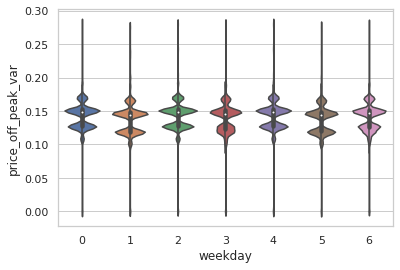

In [32]:
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ='weekday', y ='price_off_peak_var', data = dataset)

In [33]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_off_peak_var  193002 non-null  float64
 2   price_peak_var      193002 non-null  float64
 3   price_mid_peak_var  193002 non-null  float64
 4   price_off_peak_fix  193002 non-null  float64
 5   price_peak_fix      193002 non-null  float64
 6   price_mid_peak_fix  193002 non-null  float64
 7   month               193002 non-null  int64  
 8   weekday             193002 non-null  int64  
 9   hour                193002 non-null  int64  
 10  week                193002 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 16.2+ MB


In [34]:
dataset.head()

,id,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,month,weekday,hour,week
0,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,1,3,0,1
1,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,2,6,0,5
2,038af19179925da21a25619c5a24b745,0.151367,0.0,0.0,44.266931,0.0,0.0,3,6,0,9
3,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,4,2,0,14
4,038af19179925da21a25619c5a24b745,0.149626,0.0,0.0,44.266931,0.0,0.0,5,4,0,18


In [35]:
dataset['price_off_peak_var'] = dataset['price_off_peak_var'].round(2)
dataset['price_peak_var'] = dataset['price_peak_var'].round(2)
dataset['price_mid_peak_var'] = dataset['price_mid_peak_var'].round(2)
dataset['price_off_peak_fix'] = dataset['price_off_peak_fix'].round(2)
dataset['price_peak_fix'] = dataset['price_peak_fix'].round(2)
dataset['price_mid_peak_fix'] = dataset['price_mid_peak_fix'].round(2)




In [36]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  10


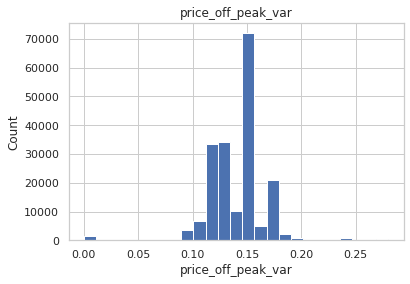

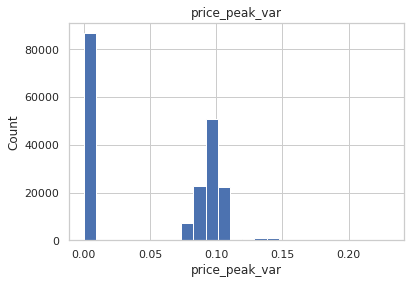

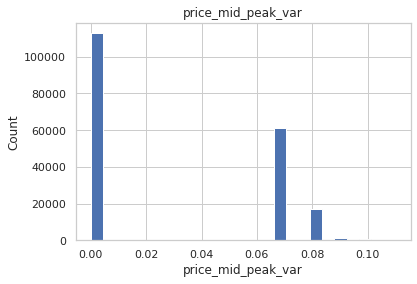

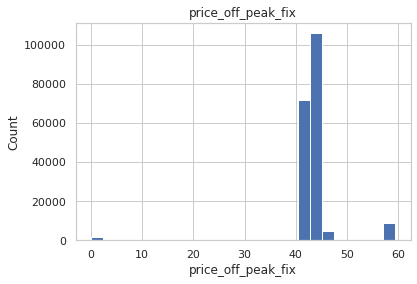

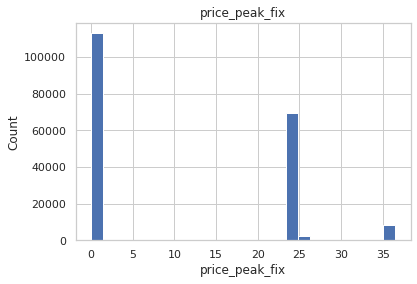

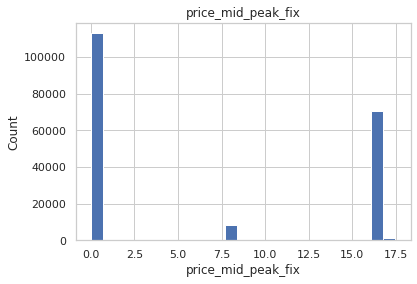

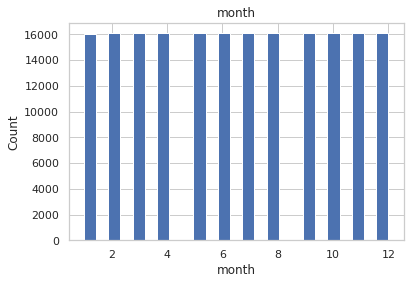

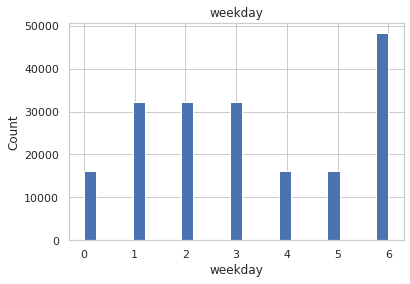

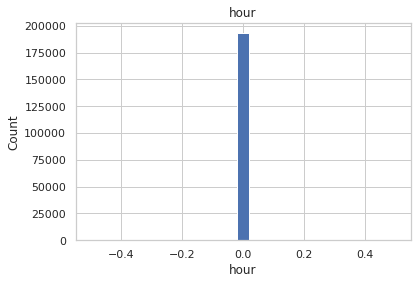

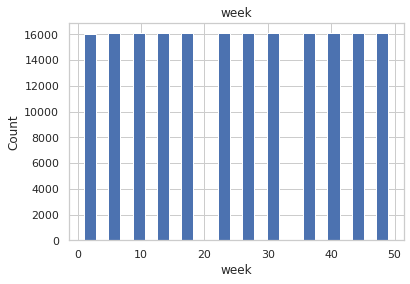

In [37]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in numerical_features:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

OBSERVATION 

Most of the features are highly skewed

In [38]:
dataset2 = pd.read_csv('/content/drive/MyDrive/BCG gamma internship - Copy/client_data.csv')

In [39]:
dataset2.shape

(14606, 26)

In [40]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [41]:
dataset2.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,6/15/2013,6/15/2016,11/1/2015,6/23/2015,0.00,0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,8/21/2009,8/30/2016,8/21/2009,8/31/2015,189.95,0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,4/16/2010,4/16/2016,4/16/2010,4/17/2015,47.96,0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,3/30/2010,3/30/2016,3/30/2010,3/31/2015,240.04,0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,1/13/2010,3/7/2016,1/13/2010,3/9/2015,445.75,526,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,12/9/2011,12/9/2016,11/1/2015,12/10/2015,796.94,1998,0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,12/2/2011,12/2/2016,12/2/2011,12/3/2015,8069.28,0,0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,4/21/2010,4/21/2016,4/21/2010,4/22/2015,864.73,751,0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,9/23/2011,9/23/2016,9/23/2011,9/25/2015,444.38,0,0,15.85,0.145711,0.000000,44.311378,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,5/4/2010,5/4/2016,4/29/2015,5/5/2015,2738.10,2188,0,130.43,0.115761,0.099419,40.606701,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [42]:
dataset2.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.29,573465.26,0.0,5674.75,14115.50,40763.75,6207104.00
cons_gas_12m,14606.0,28092.38,162973.06,0.0,0.00,0.00,0.00,4154590.00
cons_last_month,14606.0,16090.27,64364.20,0.0,0.00,792.50,3383.00,771203.00
forecast_cons_12m,14606.0,1868.61,2387.57,0.0,495.00,1112.88,2401.79,82902.83
forecast_cons_year,14606.0,1399.76,3247.79,0.0,0.00,314.00,1745.75,175375.00
forecast_discount_energy,14606.0,0.97,5.11,0.0,0.00,0.00,0.00,30.00
forecast_meter_rent_12m,14606.0,63.09,66.17,0.0,16.18,18.80,131.03,599.31
forecast_price_energy_off_peak,14606.0,0.14,0.02,0.0,0.12,0.14,0.15,0.27
forecast_price_energy_peak,14606.0,0.05,0.05,0.0,0.00,0.08,0.10,0.20
forecast_price_pow_off_peak,14606.0,43.13,4.49,0.0,40.61,44.31,44.31,59.27


In [43]:
dataset2.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [49]:
from plotly.offline import  iplot

In [61]:
EC_p_f = ['cons_12m','forecast_cons_12m','forecast_cons_year']

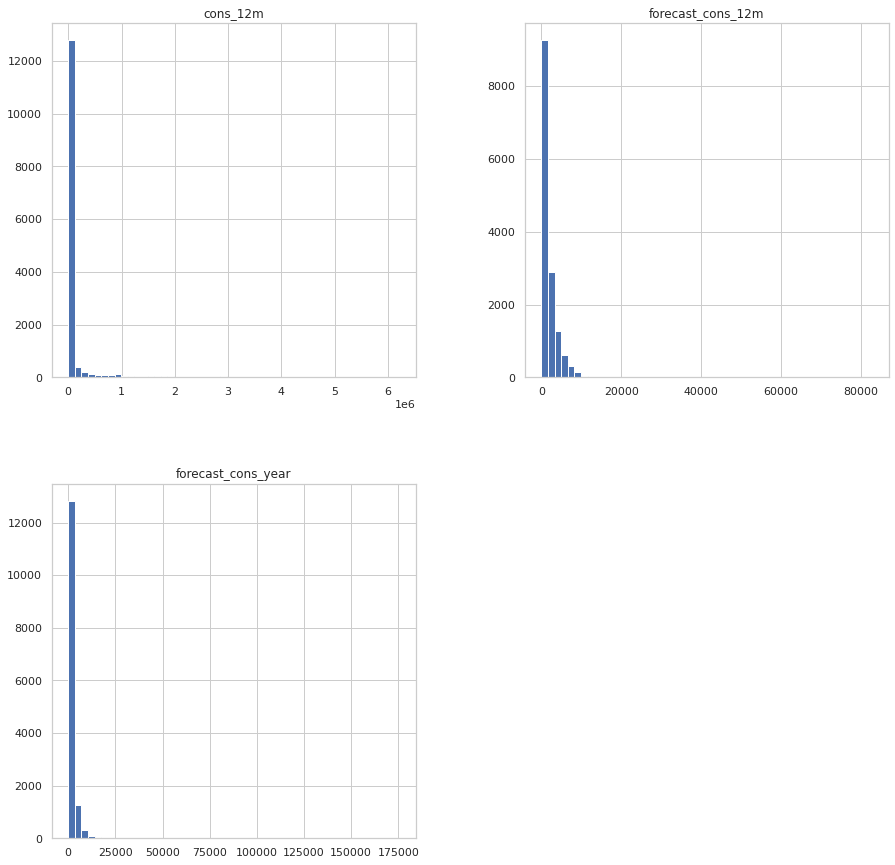

In [62]:
dataset2[EC_p_f].hist(bins=50, figsize=(15,15));

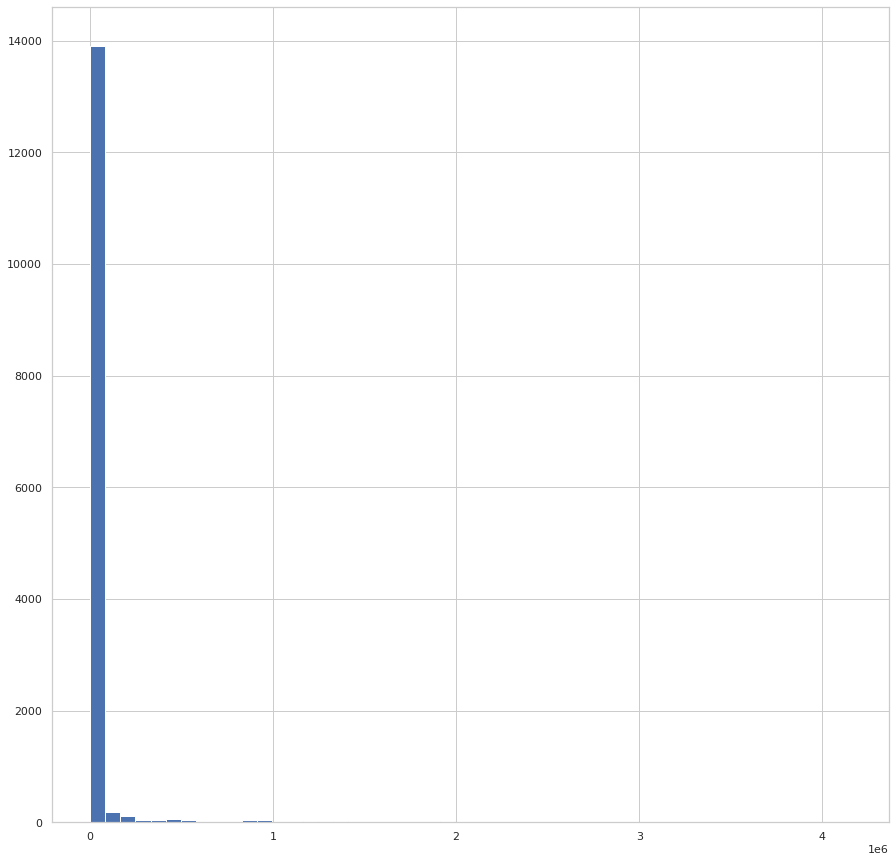

In [63]:
dataset2['cons_gas_12m'].hist(bins=50, figsize=(15,15));

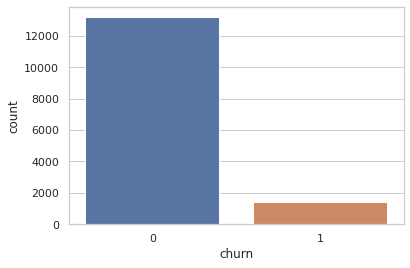

In [64]:
sns.countplot(x ='churn', data = dataset2)


In [67]:
dataset2.has_gas.unique()

array(['t', 'f'], dtype=object)

In [68]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
dataset2['has_gas']= label_encoder.fit_transform(dataset2['has_gas'])

dataset2['has_gas'].unique()


array([1, 0])

In [69]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [71]:
#removing unwanted column
dataset2 = dataset2.drop(['id','date_activ','date_end','date_modif_prod','date_renewal','origin_up'],axis=1)


In [73]:
# list of numerical variables
numerical_features = [feature for feature in dataset2.columns if dataset2[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  19


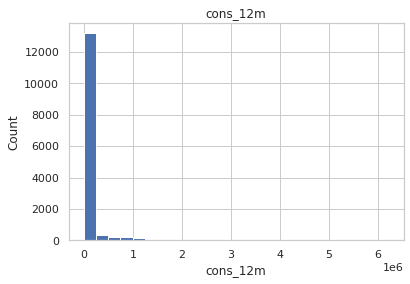

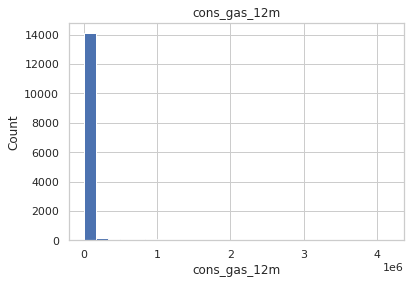

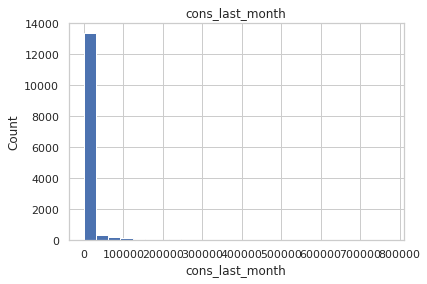

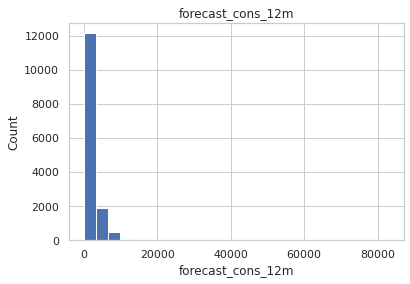

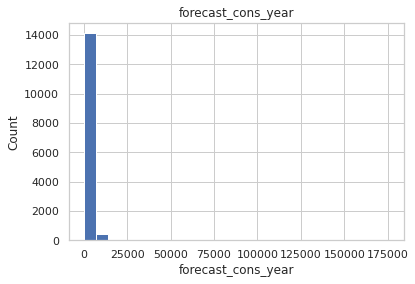

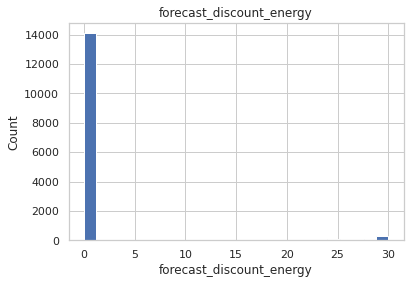

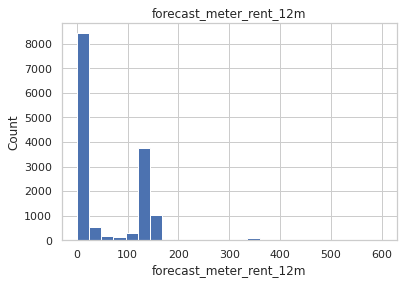

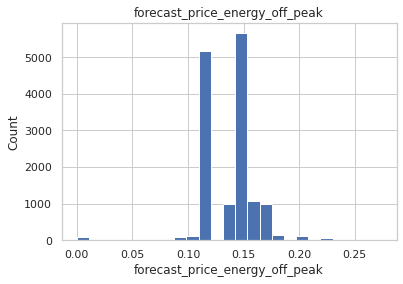

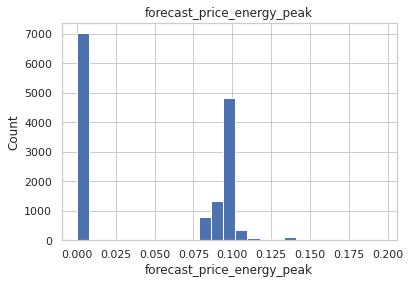

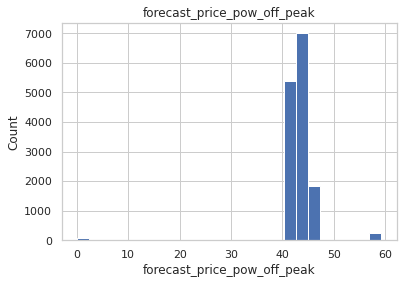

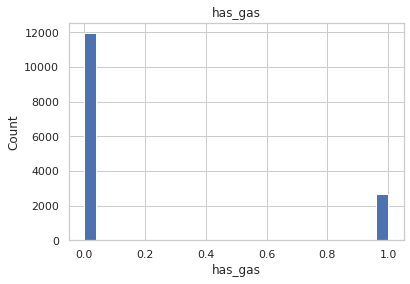

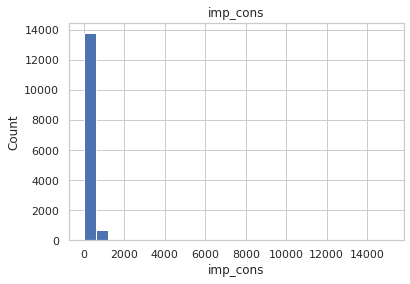

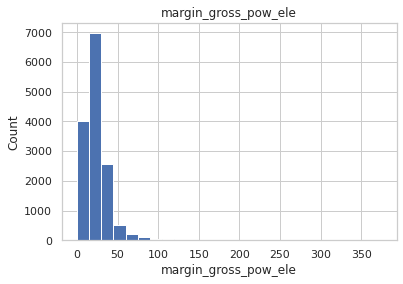

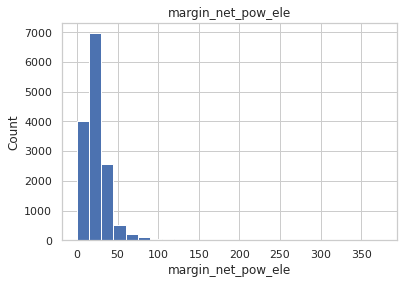

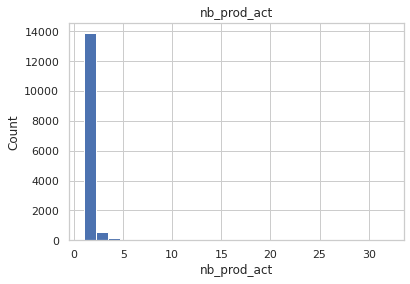

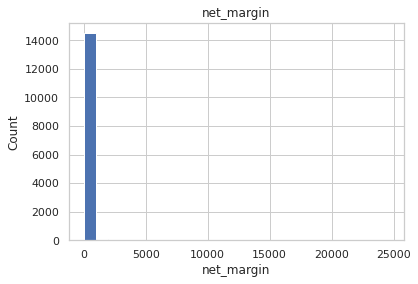

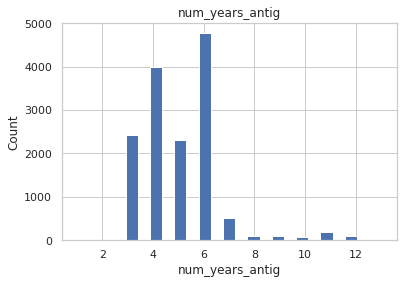

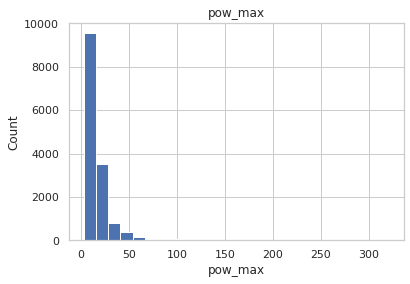

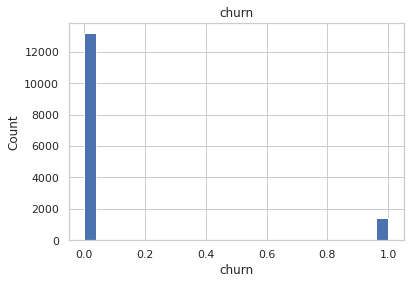

In [74]:
for feature in numerical_features:
    data=dataset2.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [78]:
import plotly.express as px


fig = px.histogram(dataset2, x="forecast_price_energy_off_peak", color = "churn")
fig.show()


In [79]:
fig = px.histogram(dataset2, x="forecast_price_energy_peak", color = "churn")
fig.show()

In [80]:
fig = px.histogram(dataset2, x="forecast_price_pow_off_peak", color = "churn")
fig.show()